In [2]:
# Essential Libraries
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# Algorithms
from minisom import MiniSom


In [8]:
df1 = pd.read_csv('IDF % 2000_2011_2021.csv')
df1 = df1[['Region', 'Country/Territory', '2000', '2011', '2021', 'Type']]
idf = df1.drop(df1.loc[df1['2011']=='-'].index)
idf = idf.drop(idf.loc[idf['2021'] == '-'].index)
idf = idf.drop(columns = '2000')
idf = idf[idf['Type'] == 'Country']
idf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 7 to 230
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Region             206 non-null    object
 1   Country/Territory  206 non-null    object
 2   2011               206 non-null    object
 3   2021               206 non-null    object
 4   Type               206 non-null    object
dtypes: object(5)
memory usage: 9.7+ KB


Year 2000 was removed as it contained many NULL values initially. By merging, NULL values in 2011/2021 are dropped. 

In [9]:
df2 = pd.read_csv('IDF % 2015.csv')
df2 = df2.rename(columns = {'Country/territory': 'Country/Territory'})
final_df = pd.merge(idf, df2, on='Country/Territory')
final_df = final_df.drop(columns = '#')
final_df

,Region,Country/Territory,2011,2021,Type,2015
0,Middle East and North Africa,Afghanistan,7.6,10.9,Country,6.6
1,Europe,Albania,2.8,10.2,Country,12.0
2,Middle East and North Africa,Algeria,7.0,7.1,Country,6.8
3,Europe,Andorra,5.4,9.7,Country,11.0
4,Africa,Angola,2.9,4.6,Country,3.3
...,...,...,...,...,...,...
189,Western Pacific,Vanuatu,16.1,15.6,Country,14.0
190,Western Pacific,Viet Nam,3.2,6.1,Country,5.6
191,Middle East and North Africa,Yemen,9.6,5.4,Country,3.8
192,Africa,Zambia,4.8,11.9,Country,3.1


In [10]:
df3 = pd.read_csv('worldbank 2017.csv')
print(df3.dtypes)
print (df3.info())
df3['2017'] = round(df3['Value'],1)
df3 = df3.rename(columns = {'Country Name': 'Country/Territory'})
df3

Country Name     object
Country Code     object
Year              int64
Value           float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  253 non-null    object 
 1   Country Code  253 non-null    object 
 2   Year          253 non-null    int64  
 3   Value         253 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.0+ KB
None


,Country/Territory,Country Code,Year,Value,2017
0,Arab World,ARB,2017,12.076977,12.1
1,Caribbean small states,CSS,2017,11.860180,11.9
2,Central Europe and the Baltics,CEB,2017,6.862542,6.9
3,Early-demographic dividend,EAR,2017,9.326212,9.3
4,East Asia & Pacific,EAS,2017,8.571482,8.6
...,...,...,...,...,...
248,Virgin Islands (U.S.),VIR,2017,12.260000,12.3
249,West Bank and Gaza,PSE,2017,10.590000,10.6
250,"Yemen, Rep.",YEM,2017,5.350000,5.4
251,Zambia,ZMB,2017,3.940000,3.9


In [11]:
df4 = pd.read_csv('worldbank 2010_2019.csv')
print (df4.dtypes)
print (df4.info())
df4 = df4.rename(columns = {'Diabetes prevalence (% of population ages 20 to 79)': '%'})
df4 = df4.rename(columns = {'Entity': 'Country/Territory'})
df4['%'] = round(df4['%'], 1)
df4_2010 = df4[df4['Year'] == 2010]
df4_2019 = df4[df4['Year'] == 2019]
df4_2010 = df4_2010.rename(columns = {'%': '2010'})
df4_2019 = df4_2019.rename(columns = {'%': '2019'})
df4_final = pd.merge(df4_2019, df4_2010, on='Country/Territory')
df4_final = df4_final[['Country/Territory', '2019', '2010']]
print(df4_final.info())


Entity                                                  object
Code                                                    object
Year                                                     int64
Diabetes prevalence (% of population ages 20 to 79)    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               511 non-null    object 
 1   Code                                                 417 non-null    object 
 2   Year                                                 511 non-null    int64  
 3   Diabetes prevalence (% of population ages 20 to 79)  511 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 0 to 25

In [12]:
final_df = pd.merge(final_df, df4_final, on='Country/Territory')
final_df = pd.merge(final_df, df3, on='Country/Territory')

In [13]:
final_df = final_df[['Region', 'Country/Territory', '2010', '2011', '2015', '2017' ,'2019', '2021']]
list2change = ['2011', '2021']
for i in list2change: 
    final_df[i] = final_df[i].astype(float)
print(final_df.dtypes)
print()
print(final_df.info())
print (final_df.describe())
print ('dims = ', final_df.shape)

Region                object
Country/Territory     object
2010                 float64
2011                 float64
2015                 float64
2017                 float64
2019                 float64
2021                 float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             169 non-null    object 
 1   Country/Territory  169 non-null    object 
 2   2010               169 non-null    float64
 3   2011               169 non-null    float64
 4   2015               169 non-null    float64
 5   2017               169 non-null    float64
 6   2019               169 non-null    float64
 7   2021               169 non-null    float64
dtypes: float64(6), object(2)
memory usage: 11.9+ KB
None
             2010        2011        2015        2017        2019        2021
count  169.000000  169.000000  16

In [14]:
final_df

,Region,Country/Territory,2010,2011,2015,2017,2019,2021
0,Middle East and North Africa,Afghanistan,8.6,7.6,6.6,9.6,9.2,10.9
1,Europe,Albania,4.5,2.8,12.0,10.1,9.0,10.2
2,Middle East and North Africa,Algeria,8.5,7.0,6.8,6.7,6.7,7.1
3,Europe,Andorra,6.6,5.4,11.0,8.0,7.7,9.7
4,Africa,Angola,3.5,2.9,3.3,3.9,4.5,4.6
...,...,...,...,...,...,...,...,...
164,South and Central America,Uruguay,5.7,5.7,6.9,6.9,7.3,9.0
165,Europe,Uzbekistan,5.2,6.4,5.2,7.6,6.5,7.0
166,Western Pacific,Vanuatu,3.2,16.1,14.0,12.0,11.9,15.6
167,Africa,Zambia,4.0,4.8,3.1,3.9,4.5,11.9


In [15]:
final_df.to_csv('final_df_time_series.csv', index=False) 

In [17]:
df = pd.read_csv('final_df_time_series.csv') 
df

,Region,Country/Territory,2010,2011,2015,2017,2019,2021
0,Middle East and North Africa,Afghanistan,8.6,7.6,6.6,9.6,9.2,10.9
1,Europe,Albania,4.5,2.8,12.0,10.1,9.0,10.2
2,Middle East and North Africa,Algeria,8.5,7.0,6.8,6.7,6.7,7.1
3,Europe,Andorra,6.6,5.4,11.0,8.0,7.7,9.7
4,Africa,Angola,3.5,2.9,3.3,3.9,4.5,4.6
...,...,...,...,...,...,...,...,...
164,South and Central America,Uruguay,5.7,5.7,6.9,6.9,7.3,9.0
165,Europe,Uzbekistan,5.2,6.4,5.2,7.6,6.5,7.0
166,Western Pacific,Vanuatu,3.2,16.1,14.0,12.0,11.9,15.6
167,Africa,Zambia,4.0,4.8,3.1,3.9,4.5,11.9


In [19]:
new_df = df[['2010', '2011','2015', '2017', '2019', '2021']] # Creating a new df to fit into SOM
new_series = new_df.to_numpy() # SOM algorithm takes in an array
som = MiniSom(3, 2,len(new_series[0]), sigma=0.3, learning_rate = 0.1) # Initialization 

som.random_weights_init(new_series) # random weight initialisation
som.train(new_series, 50000) # training the SOM model


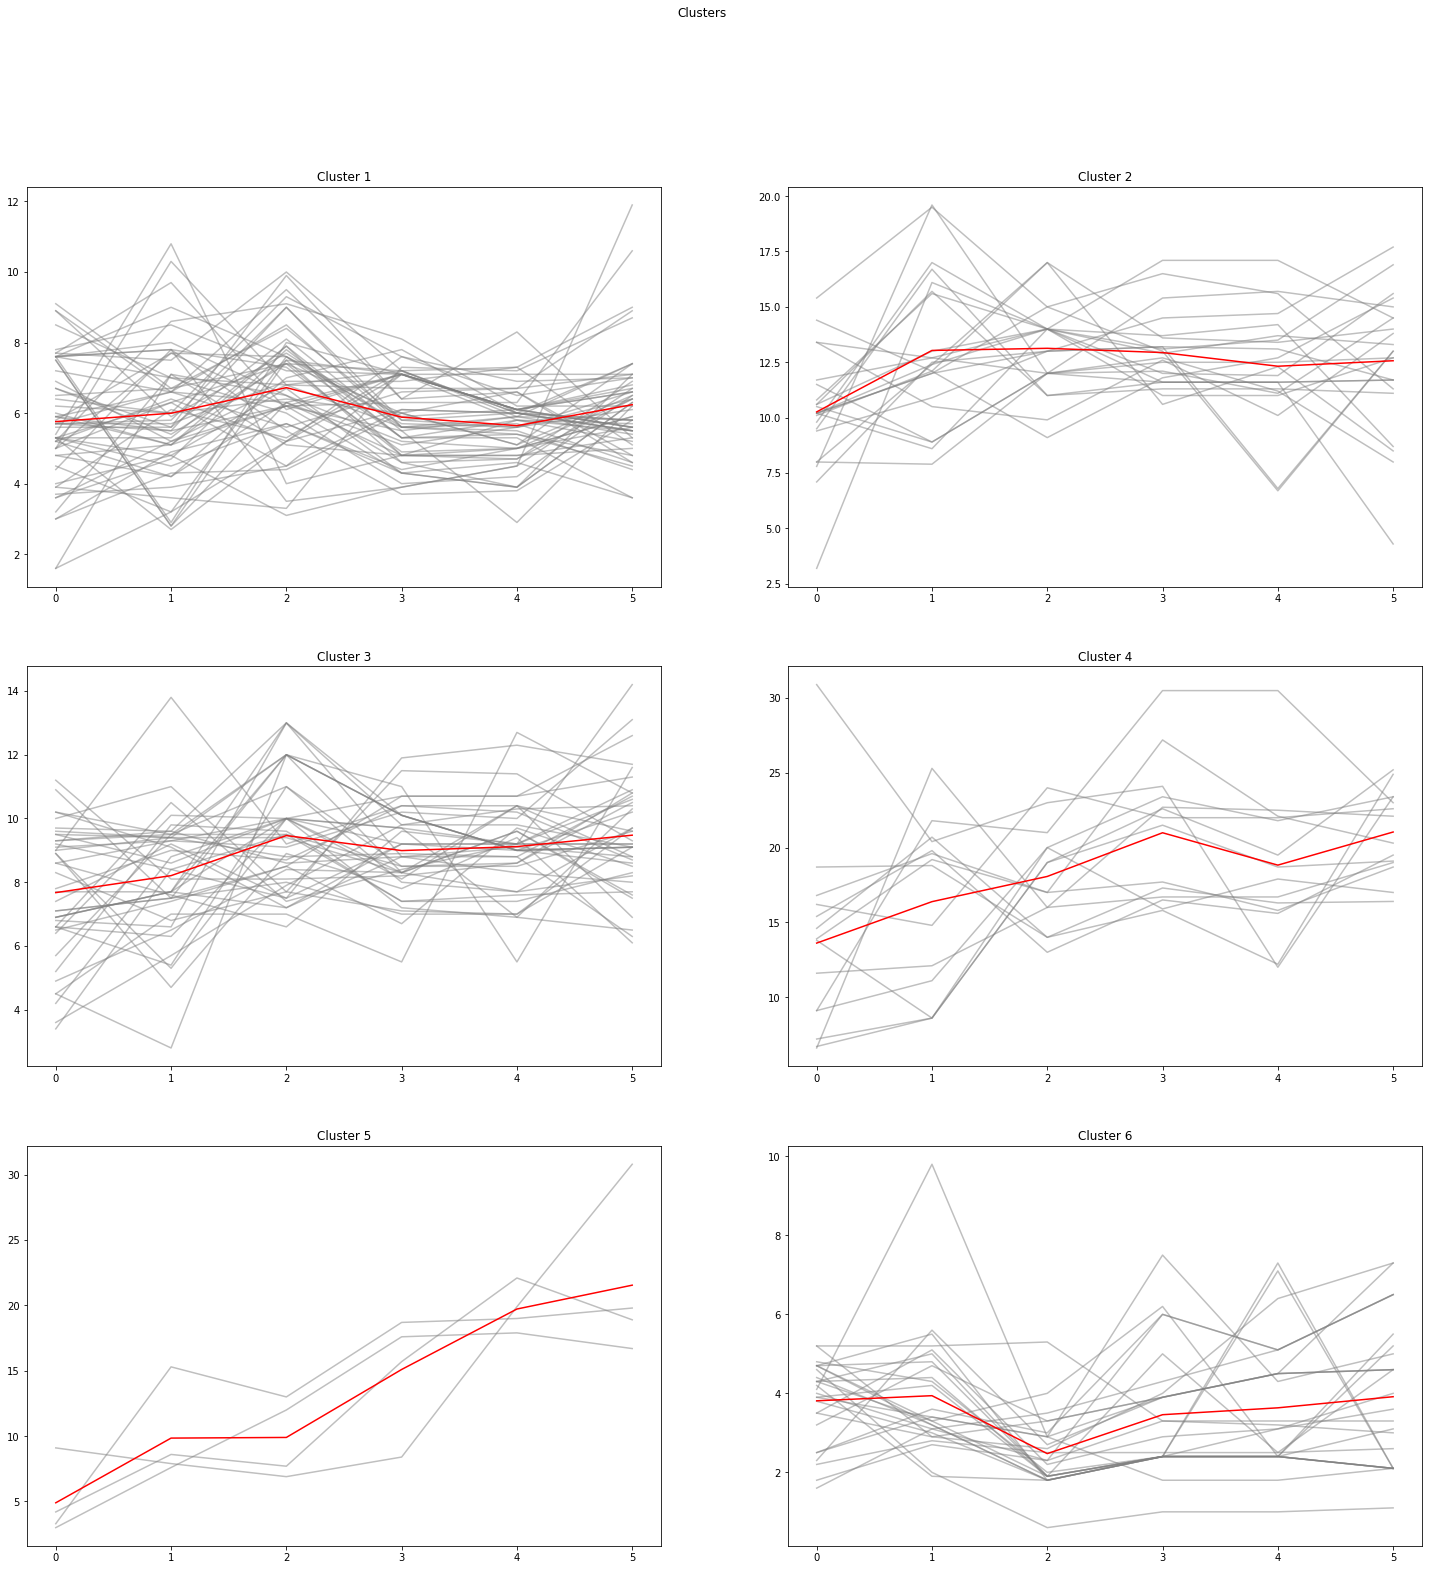

In [20]:
# Function to plot the average shape of the cluster (in red)
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()
     
win_map = som.win_map(new_series) # Returns the mapping of the winner nodes and inputs

plot_som_series_averaged_center(3, 2, win_map)

In [21]:
# Extracting the cluster number that was assigned to each country
clusters = []
for i in new_series:
    coord = som.winner(i)
    cluster = coord[0] * 2 + coord[1]+1
    clusters.append(cluster)
print (clusters)


[3, 3, 1, 3, 6, 2, 1, 1, 2, 1, 1, 1, 2, 3, 2, 1, 1, 2, 6, 2, 3, 3, 1, 3, 2, 1, 6, 6, 6, 1, 3, 2, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 2, 3, 1, 3, 1, 6, 1, 6, 2, 1, 1, 4, 1, 1, 3, 6, 1, 3, 4, 3, 6, 2, 1, 1, 1, 1, 3, 1, 3, 6, 3, 1, 2, 1, 2, 1, 6, 4, 4, 1, 2, 6, 6, 3, 3, 1, 1, 6, 6, 4, 3, 6, 3, 4, 6, 4, 2, 1, 1, 3, 3, 6, 1, 1, 4, 1, 1, 4, 1, 3, 6, 6, 1, 2, 5, 4, 3, 5, 3, 1, 1, 1, 3, 2, 4, 3, 6, 3, 1, 6, 4, 6, 3, 2, 6, 3, 1, 5, 1, 3, 3, 3, 5, 2, 1, 1, 1, 3, 6, 2, 2, 3, 2, 1, 4, 6, 1, 4, 1, 1, 1, 2, 1, 6]


<AxesSubplot:xlabel='count', ylabel='cluster'>

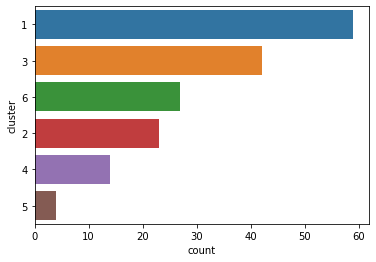

In [22]:
# Plotting the countplot of the clusters after SOM

cluster_df = pd.DataFrame(clusters, columns = ['cluster'])
countries_list = df[['Country/Territory', 'Region']] # Extracting the country/territoy and region information
clean_df = pd.concat([countries_list, cluster_df], axis =1)
sb.countplot(y="cluster", data=clean_df,
                order = clean_df['cluster'].value_counts().index)


In [23]:
# storing clean_cluster df
clean_df.to_csv('final_countries_cluster.csv', index=False) 

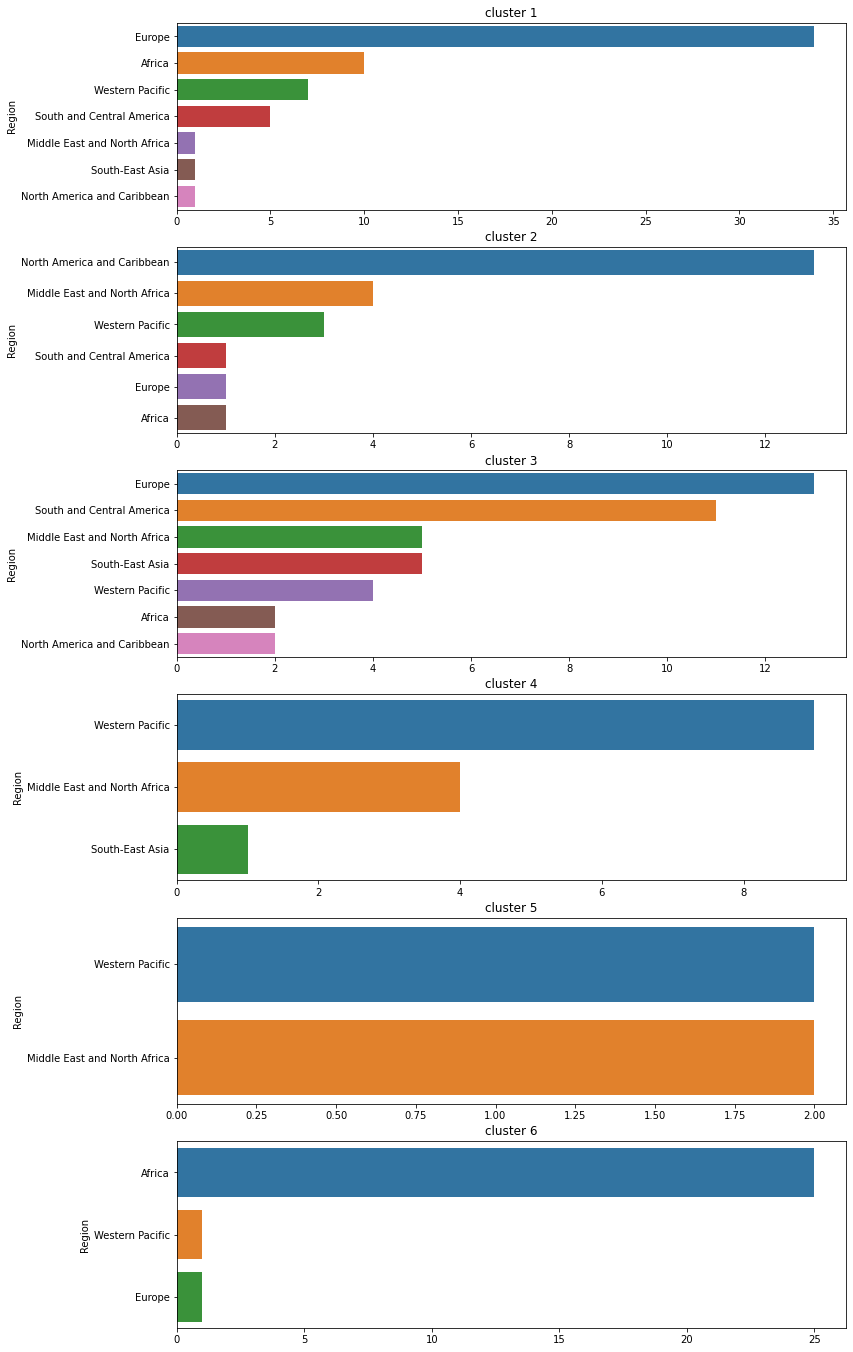

In [24]:
# Plotting a countplot to identify the number of countries in each region of each cluster

clusters_unique = clean_df['cluster'].unique()
clusters_unique = np.sort(clusters_unique)
f, axes = plt.subplots(len(clusters_unique), 1, figsize=(12, 24))
count=0
for i in clusters_unique:
    df_cluster = clean_df[clean_df['cluster'] == i]
    a = str(i)
    a = 'cluster ' + a
    axes[count].set_title(a)
    sb.countplot(y="Region", data=df_cluster,
                order = df_cluster['Region'].value_counts().index, 
                ax = axes[count]).set(xlabel = None)
    count += 1

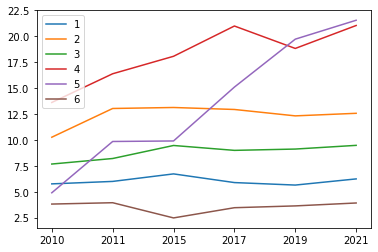

In [28]:
# Plotting all the average trend lines of SOM in one graph
clean_df = pd.read_csv('final_countries_cluster.csv')
plot_df = pd.merge(clean_df, df, on = 'Country/Territory')
plot1_df = plot_df[['cluster', '2010', '2011', 
                  '2015', '2017', '2019', '2021']]

df101 = plot1_df.groupby(['cluster']).mean()
for i in range(6):
    plt.plot(df101.iloc[i,:], label = i+1)
plt.legend()
plt.show()